# Candlestick Hanging Man

https://www.investopedia.com/articles/active-trading/040914/understanding-hanging-man-optimistic-candlestick-pattern.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2018-01-01'
end = '2021-10-08'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,10.42,11.02,10.34,10.98,10.98,44146300
2018-01-03,11.61,12.14,11.36,11.55,11.55,154066700
2018-01-04,12.10,12.43,11.97,12.12,12.12,109503000
2018-01-05,12.19,12.22,11.66,11.88,11.88,63808900
2018-01-08,12.01,12.30,11.85,12.28,12.28,63346000


## Candlestick with Hanging Man

In [3]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,736696.0,10.42,11.02,10.34,10.98,10.98,44146300,True
1,736697.0,11.61,12.14,11.36,11.55,11.55,154066700,False
2,736698.0,12.10,12.43,11.97,12.12,12.12,109503000,True
3,736699.0,12.19,12.22,11.66,11.88,11.88,63808900,False
4,736702.0,12.01,12.30,11.85,12.28,12.28,63346000,True


Text(0, 0.5, 'Price')

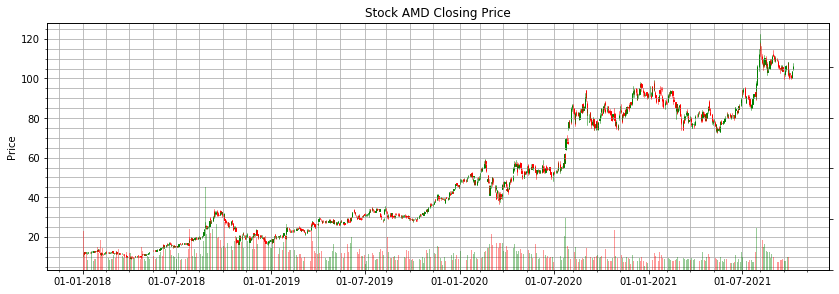

In [4]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

In [5]:
hanging_man = talib.CDLHANGINGMAN(df['Open'], df['High'], df['Low'], df['Close'])

hanging_man = hanging_man[hanging_man != 0]

In [6]:
df['hanging_man'] = talib.CDLHANGINGMAN(df['Open'], df['High'], df['Low'], df['Close'])

In [7]:
df.loc[df['hanging_man'] !=0]

,Open,High,Low,Close,Adj Close,Volume,hanging_man
Date,,,,,,,
2018-04-12,9.980000,10.100000,9.820000,10.080000,10.080000,47784400,-100
2018-07-18,16.940001,16.990000,16.549999,16.850000,16.850000,40881500,-100
2018-10-31,17.870001,18.340000,17.120001,18.209999,18.209999,110463700,-100
2018-11-26,19.959999,20.190001,19.110001,20.080000,20.080000,83211000,-100
2018-11-28,21.820000,21.879999,20.180000,21.340000,21.340000,134425300,-100
2019-01-08,21.190001,21.200001,19.680000,20.750000,20.750000,121271000,-100
2019-04-01,26.420000,26.559999,25.830000,26.360001,26.360001,63000300,-100
2019-04-02,26.510000,26.799999,26.090000,26.750000,26.750000,53358800,-100
2019-05-21,27.180000,27.370001,26.930000,27.350000,27.350000,46079200,-100


In [8]:
df['Adj Close'].loc[df['hanging_man'] !=0]

Date
2018-04-12    10.080000
2018-07-18    16.850000
2018-10-31    18.209999
2018-11-26    20.080000
2018-11-28    21.340000
2019-01-08    20.750000
2019-04-01    26.360001
2019-04-02    26.750000
2019-05-21    27.350000
2019-06-05    29.500000
2019-08-22    31.900000
2019-10-04    29.010000
2020-02-05    49.840000
2020-02-14    55.310001
2020-03-02    47.459999
2020-07-06    53.400002
2020-07-15    55.340000
2020-09-28    79.480003
2020-11-05    83.000000
2020-12-07    94.070000
2021-03-01    86.389999
2021-03-26    77.410004
2021-04-05    81.430000
2021-07-23    92.150002
Name: Adj Close, dtype: float64

In [9]:
df['Adj Close'].loc[df['hanging_man'] !=0].index

DatetimeIndex(['2018-04-12', '2018-07-18', '2018-10-31', '2018-11-26',
               '2018-11-28', '2019-01-08', '2019-04-01', '2019-04-02',
               '2019-05-21', '2019-06-05', '2019-08-22', '2019-10-04',
               '2020-02-05', '2020-02-14', '2020-03-02', '2020-07-06',
               '2020-07-15', '2020-09-28', '2020-11-05', '2020-12-07',
               '2021-03-01', '2021-03-26', '2021-04-05', '2021-07-23'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [10]:
hanging_man

Date
2018-04-12   -100
2018-07-18   -100
2018-10-31   -100
2018-11-26   -100
2018-11-28   -100
2019-01-08   -100
2019-04-01   -100
2019-04-02   -100
2019-05-21   -100
2019-06-05   -100
2019-08-22   -100
2019-10-04   -100
2020-02-05   -100
2020-02-14   -100
2020-03-02   -100
2020-07-06   -100
2020-07-15   -100
2020-09-28   -100
2020-11-05   -100
2020-12-07   -100
2021-03-01   -100
2021-03-26   -100
2021-04-05   -100
2021-07-23   -100
dtype: int32

In [11]:
hanging_man.index

DatetimeIndex(['2018-04-12', '2018-07-18', '2018-10-31', '2018-11-26',
               '2018-11-28', '2019-01-08', '2019-04-01', '2019-04-02',
               '2019-05-21', '2019-06-05', '2019-08-22', '2019-10-04',
               '2020-02-05', '2020-02-14', '2020-03-02', '2020-07-06',
               '2020-07-15', '2020-09-28', '2020-11-05', '2020-12-07',
               '2021-03-01', '2021-03-26', '2021-04-05', '2021-07-23'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,hanging_man
Date,,,,,,,
2018-01-02,10.420000,11.020000,10.340000,10.980000,10.980000,44146300,0
2018-01-03,11.610000,12.140000,11.360000,11.550000,11.550000,154066700,0
2018-01-04,12.100000,12.430000,11.970000,12.120000,12.120000,109503000,0
2018-01-05,12.190000,12.220000,11.660000,11.880000,11.880000,63808900,0
2018-01-08,12.010000,12.300000,11.850000,12.280000,12.280000,63346000,0
...,...,...,...,...,...,...,...
2021-10-01,102.599998,103.000000,100.639999,102.449997,102.449997,41491600,0
2021-10-04,101.739998,101.849998,99.820000,100.339996,100.339996,41967100,0
2021-10-05,100.919998,102.870003,100.610001,101.809998,101.809998,31455200,0


Text(0, 0.5, 'Price')

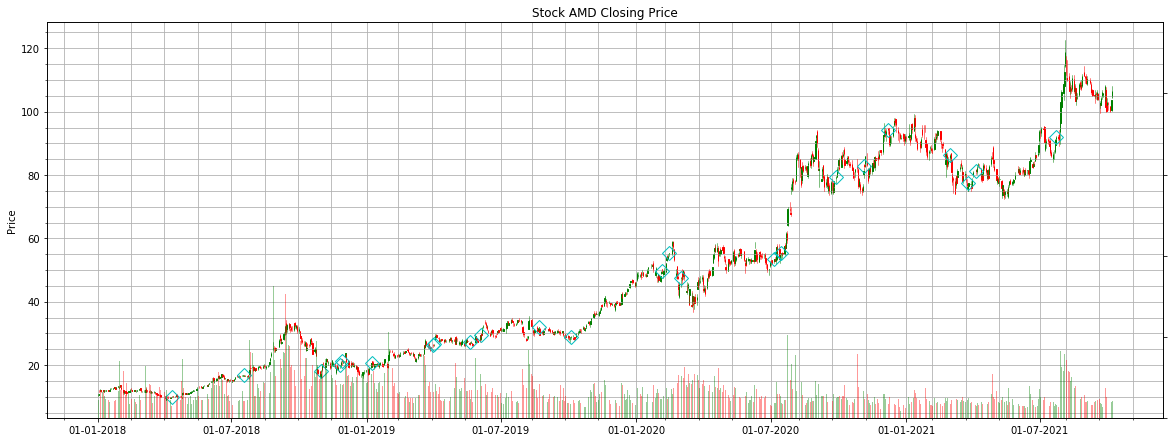

In [13]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['hanging_man'] !=0].index, df['Adj Close'].loc[df['hanging_man'] !=0],
                'Dc', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=10.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

## Plot Certain dates

In [14]:
df = df['2021-07-01':'2021-08-01']
dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,hanging_man,VolumePositive
0,737972.0,94.040001,94.180000,91.699997,93.309998,93.309998,58059000,0,False
1,737973.0,93.279999,95.269997,92.209999,94.699997,94.699997,51316700,0,True
2,737977.0,94.879997,95.410004,93.320000,94.470001,94.470001,44930100,0,False
3,737978.0,95.019997,95.440002,90.309998,90.540001,90.540001,51498500,0,False
4,737979.0,87.860001,90.339996,87.449997,89.739998,89.739998,45673500,0,True


Text(0, 0.5, 'Price')

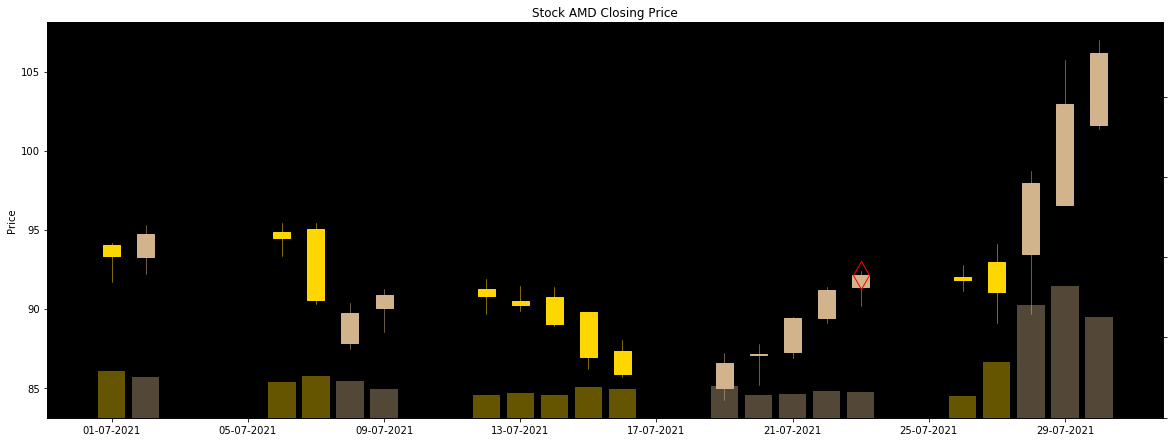

In [15]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
ax.set_facecolor('black')
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='tan', colordown='gold', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['hanging_man'] !=0].index, df['Adj Close'].loc[df['hanging_man'] !=0],
                'dr', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=20.0) 
colors = dfc.VolumePositive.map({True: 'tan', False: 'gold'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

# Highlight Candlestick

Text(0, 0.5, 'Price')

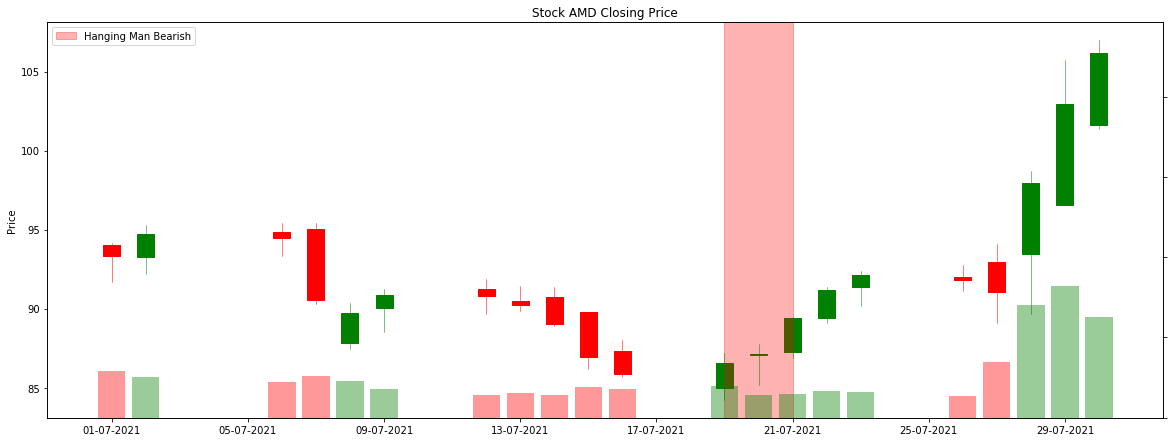

In [16]:
from matplotlib.dates import date2num
from datetime import datetime

fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.axvspan(date2num(datetime(2021,7,19)), date2num(datetime(2021,7,21)), 
           label="Hanging Man Bearish",color="red", alpha=0.3)
ax.legend()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')